In [1]:
using Pkg; Pkg.activate(".")

  Activating environment at `~/Documents/Coding/julia/manning/proj1/proj2a/Project.toml`


In [2]:
Pkg.add(["DataFrames", "CSV", "Plots", "Arrow"])

    Updating registry at `~/.julia/registries/General`
   Resolving package versions...
  No Changes to `~/Documents/Coding/julia/manning/proj1/proj2a/Project.toml`
  No Changes to `~/Documents/Coding/julia/manning/proj1/proj2a/Manifest.toml`


In [3]:
using DataFrames, CSV, SHA, Downloads, Arrow, Plots

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00396/Sales_Transactions_Dataset_Weekly.csv";

In [5]:
file = if !isfile(basename(url))
    Downloads.download(url, basename(url))
else
    basename(url)
end

"Sales_Transactions_Dataset_Weekly.csv"

In [6]:
sha = [0x07, 0xa7, 0x28, 0x88, 0x1e,
0xd7, 0x06, 0xac, 0xfc, 0x88,
0x04, 0xb6, 0xce, 0x7d, 0x06,
0xca, 0x2c, 0x65, 0x11, 0x90];

In [7]:
open(file) do f
    @assert sha1(f) == sha
end

In [8]:
ENV["COLUMNS"] = 1200
ENV["LINES"] = 200;

In [9]:
df = CSV.read(file, DataFrame)

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,W11,W12,W13,W14,W15,W16,W17,W18,W19,W20,W21,W22,W23,W24,W25,W26,W27,W28,W29,W30,W31,W32,W33,W34,W35,W36,W37,W38,W39,W40,W41,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51,MIN,MAX,Normalized 0,Normalized 1,Normalized 2,Normalized 3,Normalized 4,Normalized 5,Normalized 6,Normalized 7,Normalized 8,Normalized 9,Normalized 10,Normalized 11,Normalized 12,Normalized 13,Normalized 14,Normalized 15,Normalized 16,Normalized 17,Normalized 18,Normalized 19,Normalized 20,Normalized 21,Normalized 22,Normalized 23,Normalized 24,Normalized 25,Normalized 26,Normalized 27,Normalized 28,Normalized 29,Normalized 30,Normalized 31,Normalized 32,Normalized 33,Normalized 34,Normalized 35,Normalized 36,Normalized 37,Normalized 38,Normalized 39,Normalized 40,Normalized 41,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
,String,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,P1,11,12,10,8,13,12,14,21,6,14,11,14,16,9,9,9,14,9,3,12,5,11,7,12,5,9,7,10,5,11,7,10,12,6,5,14,10,9,12,17,7,11,4,7,8,10,12,3,7,6,5,10,3,21,0.44,0.5,0.39,0.28,0.56,0.5,0.61,1.0,0.17,0.61,0.44,0.61,0.72,0.33,0.33,0.33,0.61,0.33,0.0,0.5,0.11,0.44,0.22,0.5,0.11,0.33,0.22,0.39,0.11,0.44,0.22,0.39,0.5,0.17,0.11,0.61,0.39,0.33,0.5,0.78,0.22,0.44,0.06,0.22,0.28,0.39,0.5,0.0,0.22,0.17,0.11,0.39
2,P2,7,6,3,2,7,1,6,3,3,3,2,2,6,2,0,6,2,7,7,9,4,7,2,4,5,3,5,8,5,5,3,1,3,2,3,10,5,2,7,3,2,5,2,4,5,1,1,4,5,1,6,0,0,10,0.7,0.6,0.3,0.2,0.7,0.1,0.6,0.3,0.3,0.3,0.2,0.2,0.6,0.2,0.0,0.6,0.2,0.7,0.7,0.9,0.4,0.7,0.2,0.4,0.5,0.3,0.5,0.8,0.5,0.5,0.3,0.1,0.3,0.2,0.3,1.0,0.5,0.2,0.7,0.3,0.2,0.5,0.2,0.4,0.5,0.1,0.1,0.4,0.5,0.1,0.6,0.0
3,P3,7,11,8,9,10,8,7,13,12,6,14,9,4,7,12,8,7,11,10,7,7,13,11,8,10,8,14,5,3,13,11,9,7,8,7,9,6,12,12,9,3,5,6,14,5,5,7,8,14,8,8,7,3,14,0.36,0.73,0.45,0.55,0.64,0.45,0.36,0.91,0.82,0.27,1.0,0.55,0.09,0.36,0.82,0.45,0.36,0.73,0.64,0.36,0.36,0.91,0.73,0.45,0.64,0.45,1.0,0.18,0.0,0.91,0.73,0.55,0.36,0.45,0.36,0.55,0.27,0.82,0.82,0.55,0.0,0.18,0.27,1.0,0.18,0.18,0.36,0.45,1.0,0.45,0.45,0.36
4,P4,12,8,13,5,9,6,9,13,13,11,8,4,5,4,15,7,11,9,15,4,6,7,11,7,9,6,10,10,2,6,7,2,5,12,5,19,8,6,8,8,12,6,9,10,3,4,6,8,14,8,7,8,2,19,0.59,0.35,0.65,0.18,0.41,0.24,0.41,0.65,0.65,0.53,0.35,0.12,0.18,0.12,0.76,0.29,0.53,0.41,0.76,0.12,0.24,0.29,0.53,0.29,0.41,0.24,0.47,0.47,0.0,0.24,0.29,0.0,0.18,0.59,0.18,1.0,0.35,0.24,0.35,0.35,0.59,0.24,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
5,P5,8,5,13,11,6,7,9,14,9,9,11,18,8,4,13,8,10,15,6,13,11,6,10,9,8,12,8,9,13,3,5,3,5,5,9,7,4,8,8,5,5,8,7,11,7,12,6,6,5,11,8,9,3,18,0.33,0.13,0.67,0.53,0.2,0.27,0.4,0.73,0.4,0.4,0.53,1.0,0.33,0.07,0.67,0.33,0.47,0.8,0.2,0.67,0.53,0.2,0.47,0.4,0.33,0.6,0.33,0.4,0.67,0.0,0.13,0.0,0.13,0.13,0.4,0.27,0.07,0.33,0.33,0.13,0.13,0.33,0.27,0.53,0.27,0.6,0.2,0.2,0.13,0.53,0.33,0.4
6,P6,3,3,2,7,6,3,8,6,6,3,1,1,5,4,3,5,3,5,10,8,4,9,7,5,4,2,1,3,2,4,0,3,2,11,2,1,4,4,3,2,5,4,4,2,4,3,6,5,3,3,10,6,0,11,0.27,0.27,0.18,0.64,0.55,0.27,0.73,0.55,0.55,0.27,0.09,0.09,0.45,0.36,0.27,0.45,0.27,0.45,0.91,0.73,0.36,0.82,0.64,0.45,0.36,0.18,0.09,0.27,0.18,0.36,0.0,0.27,0.18,1.0,0.18,0.09,0.36,0.36,0.27,0.18,0.45,0.36,0.36,0.18,0.36,0.27,0.55,0.45,0.27,0.27,0.91,0.55
7,P7,4,8,3,7,8,7,2,3,10,3,5,2,3,4,5,3,7,10,0,3,7,5,1,5,7,5,2,4,3,1,3,2,2,4,2,6,4

In [10]:
describe(df)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,Product_Code,,P1,,P99,0,String
2,W0,8.90259,0,3.0,54,0,Int64
3,W1,9.12947,0,3.0,53,0,Int64
4,W2,9.38964,0,3.0,56,0,Int64
5,W3,9.71763,0,4.0,59,0,Int64
6,W4,9.5746,0,4.0,61,0,Int64
7,W5,9.46609,0,3.0,52,0,Int64
8,W6,9.7201,0,4.0,56,0,Int64
9,W7,9.5857,0,4.0,62,0,Int64


In [11]:
ENV["LINES"] = 20;

In [12]:
# Taken from stack
function allclose(a, b; rtol = 1e-5, atol = 1e-8)
    return all(abs.(a - b) .<= (atol .+ rtol .* abs.(b)))
end

allclose (generic function with 1 method)

In [13]:
using Statistics

In [14]:
for i in 0:51
    w = Float64.(df[!, "W$i"])
    n = df[!, "Normalized $i"]
    # w .= (w .- mean(w)) ./ std(w)
    w .= (w .- minimum(w))
    w .= w ./ maximum(w)
    
    if !allclose(w, n)
        @show sum(abs.(w - n))
        println("Sth wrong with column $i normalization")
    end
    # @show minimum(w), maximum(w), minimum(n), maximum(n)
end

sum(abs.(w - n)) = 140.32740740740743
Sth wrong with column 0 normalization
sum(abs.(w - n)) = 142.57301886792453
Sth wrong with column 1 normalization
sum(abs.(w - n)) = 139.72785714285712
Sth wrong with column 2 normalization
sum(abs.(w - n)) = 142.97627118644067
Sth wrong with column 3 normalization
sum(abs.(w - n)) = 156.2744262295082
Sth wrong with column 4 normalization
sum(abs.(w - n)) = 150.71538461538464
Sth wrong with column 5 normalization
sum(abs.(w - n)) = 153.675
Sth wrong with column 6 normalization
sum(abs.(w - n)) = 155.58354838709676
Sth wrong with column 7 normalization
sum(abs.(w - n)) = 150.7457142857143
Sth wrong with column 8 normalization
sum(abs.(w - n)) = 150.17000000000002
Sth wrong with column 9 normalization
sum(abs.(w - n)) = 150.55142857142857
Sth wrong with column 10 normalization
sum(abs.(w - n)) = 155.9478947368421
Sth wrong with column 11 normalization
sum(abs.(w - n)) = 160.08508196721317
Sth wrong with column 12 normalization
sum(abs.(w - n)) = 154.

I don't know what is going on here and how these columns were normalized.
They are [0, 1] but I don't know how they ended up like that.

In [15]:
means = mean.(eachcol(select(df, r"Normalized")))
stds = std.(eachcol(select(df, r"Normalized")));

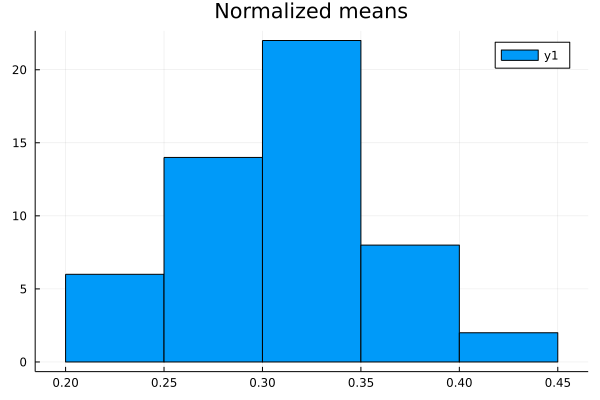

In [16]:
histogram(means, title="Normalized means")

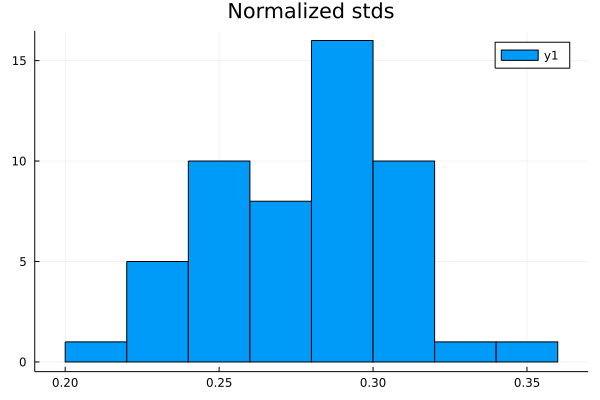

In [17]:
histogram(stds, title="Normalized stds")

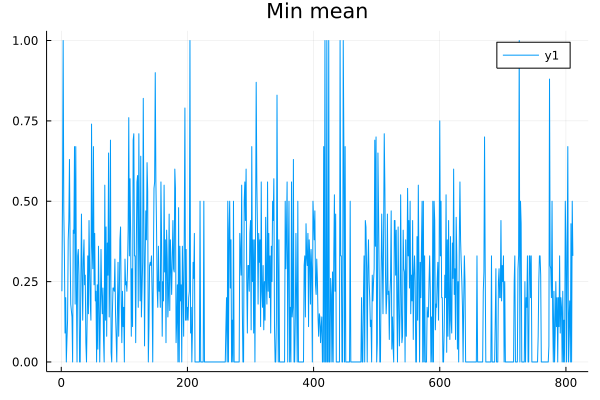

In [18]:
plot(select(df, r"Normalized")[!, argmin(means)], title="Min mean")

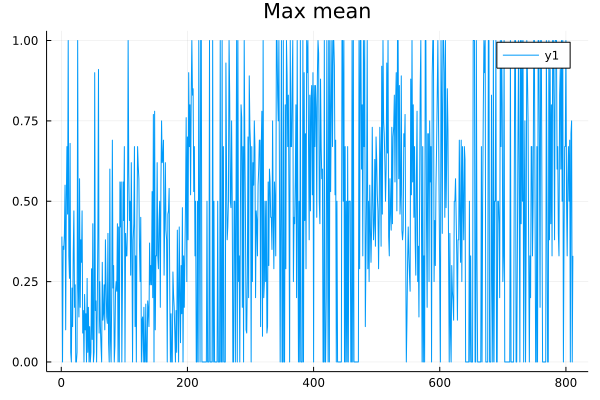

In [19]:
plot(select(df, r"Normalized")[!, argmax(means)], title="Max mean")

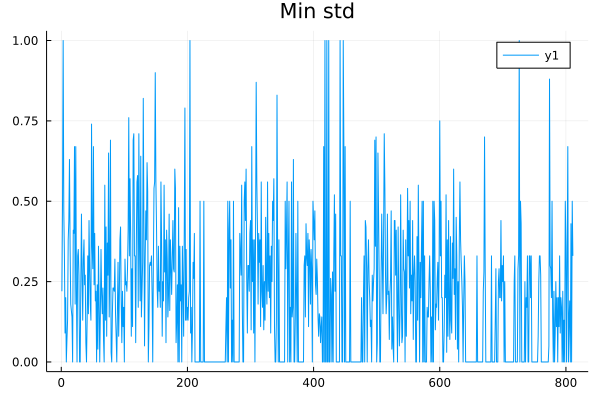

In [20]:
plot(select(df, r"Normalized")[!, argmin(stds)], title="Min std")

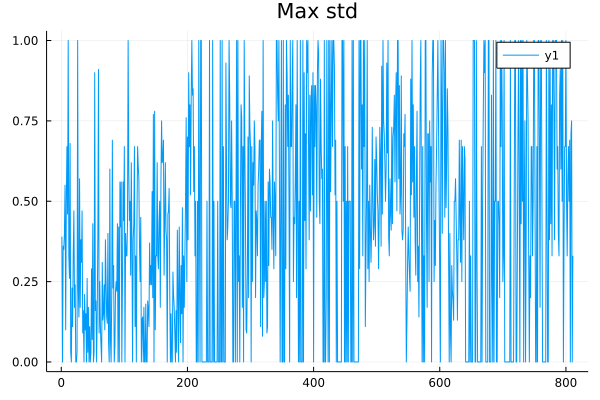

In [21]:
plot(select(df, r"Normalized")[!, argmax(stds)], title="Max std")

In [22]:
df2 = copy(df)

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,W11,W12,W13,W14,W15,W16,W17,W18,W19,W20,W21,W22,W23,W24,W25,W26,W27,W28,W29,W30,W31,W32,W33,W34,W35,W36,W37,W38,W39,W40,W41,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51,MIN,MAX,Normalized 0,Normalized 1,Normalized 2,Normalized 3,Normalized 4,Normalized 5,Normalized 6,Normalized 7,Normalized 8,Normalized 9,Normalized 10,Normalized 11,Normalized 12,Normalized 13,Normalized 14,Normalized 15,Normalized 16,Normalized 17,Normalized 18,Normalized 19,Normalized 20,Normalized 21,Normalized 22,Normalized 23,Normalized 24,Normalized 25,Normalized 26,Normalized 27,Normalized 28,Normalized 29,Normalized 30,Normalized 31,Normalized 32,Normalized 33,Normalized 34,Normalized 35,Normalized 36,Normalized 37,Normalized 38,Normalized 39,Normalized 40,Normalized 41,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
,String,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,P1,11,12,10,8,13,12,14,21,6,14,11,14,16,9,9,9,14,9,3,12,5,11,7,12,5,9,7,10,5,11,7,10,12,6,5,14,10,9,12,17,7,11,4,7,8,10,12,3,7,6,5,10,3,21,0.44,0.5,0.39,0.28,0.56,0.5,0.61,1.0,0.17,0.61,0.44,0.61,0.72,0.33,0.33,0.33,0.61,0.33,0.0,0.5,0.11,0.44,0.22,0.5,0.11,0.33,0.22,0.39,0.11,0.44,0.22,0.39,0.5,0.17,0.11,0.61,0.39,0.33,0.5,0.78,0.22,0.44,0.06,0.22,0.28,0.39,0.5,0.0,0.22,0.17,0.11,0.39
2,P2,7,6,3,2,7,1,6,3,3,3,2,2,6,2,0,6,2,7,7,9,4,7,2,4,5,3,5,8,5,5,3,1,3,2,3,10,5,2,7,3,2,5,2,4,5,1,1,4,5,1,6,0,0,10,0.7,0.6,0.3,0.2,0.7,0.1,0.6,0.3,0.3,0.3,0.2,0.2,0.6,0.2,0.0,0.6,0.2,0.7,0.7,0.9,0.4,0.7,0.2,0.4,0.5,0.3,0.5,0.8,0.5,0.5,0.3,0.1,0.3,0.2,0.3,1.0,0.5,0.2,0.7,0.3,0.2,0.5,0.2,0.4,0.5,0.1,0.1,0.4,0.5,0.1,0.6,0.0
3,P3,7,11,8,9,10,8,7,13,12,6,14,9,4,7,12,8,7,11,10,7,7,13,11,8,10,8,14,5,3,13,11,9,7,8,7,9,6,12,12,9,3,5,6,14,5,5,7,8,14,8,8,7,3,14,0.36,0.73,0.45,0.55,0.64,0.45,0.36,0.91,0.82,0.27,1.0,0.55,0.09,0.36,0.82,0.45,0.36,0.73,0.64,0.36,0.36,0.91,0.73,0.45,0.64,0.45,1.0,0.18,0.0,0.91,0.73,0.55,0.36,0.45,0.36,0.55,0.27,0.82,0.82,0.55,0.0,0.18,0.27,1.0,0.18,0.18,0.36,0.45,1.0,0.45,0.45,0.36
4,P4,12,8,13,5,9,6,9,13,13,11,8,4,5,4,15,7,11,9,15,4,6,7,11,7,9,6,10,10,2,6,7,2,5,12,5,19,8,6,8,8,12,6,9,10,3,4,6,8,14,8,7,8,2,19,0.59,0.35,0.65,0.18,0.41,0.24,0.41,0.65,0.65,0.53,0.35,0.12,0.18,0.12,0.76,0.29,0.53,0.41,0.76,0.12,0.24,0.29,0.53,0.29,0.41,0.24,0.47,0.47,0.0,0.24,0.29,0.0,0.18,0.59,0.18,1.0,0.35,0.24,0.35,0.35,0.59,0.24,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
5,P5,8,5,13,11,6,7,9,14,9,9,11,18,8,4,13,8,10,15,6,13,11,6,10,9,8,12,8,9,13,3,5,3,5,5,9,7,4,8,8,5,5,8,7,11,7,12,6,6,5,11,8,9,3,18,0.33,0.13,0.67,0.53,0.2,0.27,0.4,0.73,0.4,0.4,0.53,1.0,0.33,0.07,0.67,0.33,0.47,0.8,0.2,0.67,0.53,0.2,0.47,0.4,0.33,0.6,0.33,0.4,0.67,0.0,0.13,0.0,0.13,0.13,0.4,0.27,0.07,0.33,0.33,0.13,0.13,0.33,0.27,0.53,0.27,0.6,0.2,0.2,0.13,0.53,0.33,0.4
6,P6,3,3,2,7,6,3,8,6,6,3,1,1,5,4,3,5,3,5,10,8,4,9,7,5,4,2,1,3,2,4,0,3,2,11,2,1,4,4,3,2,5,4,4,2,4,3,6,5,3,3,10,6,0,11,0.27,0.27,0.18,0.64,0.55,0.27,0.73,0.55,0.55,0.27,0.09,0.09,0.45,0.36,0.27,0.45,0.27,0.45,0.91,0.73,0.36,0.82,0.64,0.45,0.36,0.18,0.09,0.27,0.18,0.36,0.0,0.27,0.18,1.0,0.18,0.09,0.36,0.36,0.27,0.18,0.45,0.36,0.36,0.18,0.36,0.27,0.55,0.45,0.27,0.27,0.91,0.55
7,P7,4,8,3,7,8,7,2,3,10,3,5,2,3,4,5,3,7,10,0,3,7,5,1,5,7,5,2,4,3,1,3,2,2,4,2,6,4

In [23]:
df = copy(df2)
first(select(df, r"Nor"), 5)

,Normalized 0,Normalized 1,Normalized 2,Normalized 3,Normalized 4,Normalized 5,Normalized 6,Normalized 7,Normalized 8,Normalized 9,Normalized 10,Normalized 11,Normalized 12,Normalized 13,Normalized 14,Normalized 15,Normalized 16,Normalized 17,Normalized 18,Normalized 19,Normalized 20,Normalized 21,Normalized 22,Normalized 23,Normalized 24,Normalized 25,Normalized 26,Normalized 27,Normalized 28,Normalized 29,Normalized 30,Normalized 31,Normalized 32,Normalized 33,Normalized 34,Normalized 35,Normalized 36,Normalized 37,Normalized 38,Normalized 39,Normalized 40,Normalized 41,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.44,0.5,0.39,0.28,0.56,0.5,0.61,1.0,0.17,0.61,0.44,0.61,0.72,0.33,0.33,0.33,0.61,0.33,0.0,0.5,0.11,0.44,0.22,0.5,0.11,0.33,0.22,0.39,0.11,0.44,0.22,0.39,0.5,0.17,0.11,0.61,0.39,0.33,0.5,0.78,0.22,0.44,0.06,0.22,0.28,0.39,0.5,0.0,0.22,0.17,0.11,0.39
2,0.7,0.6,0.3,0.2,0.7,0.1,0.6,0.3,0.3,0.3,0.2,0.2,0.6,0.2,0.0,0.6,0.2,0.7,0.7,0.9,0.4,0.7,0.2,0.4,0.5,0.3,0.5,0.8,0.5,0.5,0.3,0.1,0.3,0.2,0.3,1.0,0.5,0.2,0.7,0.3,0.2,0.5,0.2,0.4,0.5,0.1,0.1,0.4,0.5,0.1,0.6,0.0
3,0.36,0.73,0.45,0.55,0.64,0.45,0.36,0.91,0.82,0.27,1.0,0.55,0.09,0.36,0.82,0.45,0.36,0.73,0.64,0.36,0.36,0.91,0.73,0.45,0.64,0.45,1.0,0.18,0.0,0.91,0.73,0.55,0.36,0.45,0.36,0.55,0.27,0.82,0.82,0.55,0.0,0.18,0.27,1.0,0.18,0.18,0.36,0.45,1.0,0.45,0.45,0.36
4,0.59,0.35,0.65,0.18,0.41,0.24,0.41,0.65,0.65,0.53,0.35,0.12,0.18,0.12,0.76,0.29,0.53,0.41,0.76,0.12,0.24,0.29,0.53,0.29,0.41,0.24,0.47,0.47,0.0,0.24,0.29,0.0,0.18,0.59,0.18,1.0,0.35,0.24,0.35,0.35,0.59,0.24,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
5,0.33,0.13,0.67,0.53,0.2,0.27,0.4,0.73,0.4,0.4,0.53,1.0,0.33,0.07,0.67,0.33,0.47,0.8,0.2,0.67,0.53,0.2,0.47,0.4,0.33,0.6,0.33,0.4,0.67,0.0,0.13,0.0,0.13,0.13,0.4,0.27,0.07,0.33,0.33,0.13,0.13,0.33,0.27,0.53,0.27,0.6,0.2,0.2,0.13,0.53,0.33,0.4


In [24]:
for i in 0:51
    w = Float64.(df[!, "W$i"])
    w .= (w .- mean(w)) ./ std(w)
    df[!, "Normalized $i"] .= w
end

In [25]:
first(select(df, r"Nor"), 5)

,Normalized 0,Normalized 1,Normalized 2,Normalized 3,Normalized 4,Normalized 5,Normalized 6,Normalized 7,Normalized 8,Normalized 9,Normalized 10,Normalized 11,Normalized 12,Normalized 13,Normalized 14,Normalized 15,Normalized 16,Normalized 17,Normalized 18,Normalized 19,Normalized 20,Normalized 21,Normalized 22,Normalized 23,Normalized 24,Normalized 25,Normalized 26,Normalized 27,Normalized 28,Normalized 29,Normalized 30,Normalized 31,Normalized 32,Normalized 33,Normalized 34,Normalized 35,Normalized 36,Normalized 37,Normalized 38,Normalized 39,Normalized 40,Normalized 41,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.173811,0.228459,0.0467884,-0.126732,0.261566,0.197604,0.320655,0.874717,-0.279273,0.328677,0.0890887,0.332255,0.461797,-0.0519723,-0.0677762,-0.0760804,0.285574,-0.0677209,-0.516769,0.179379,-0.359926,0.100543,-0.22322,0.169454,-0.420079,0.0107094,0.00521971,0.288445,-0.23395,0.360259,-0.0573465,0.229974,0.39578,-0.175887,-0.276462,0.557143,0.181281,0.0853104,0.332543,0.839742,-0.106736,0.247687,-0.387229,-0.117162,-0.0386717,0.126857,0.282223,-0.495876,-0.1492,-0.264609,-0.368055,0.116235
2,-0.157667,-0.249067,-0.489813,-0.569429,-0.196598,-0.660217,-0.278714,-0.504684,-0.500671,-0.508595,-0.573764,-0.590286,-0.28634,-0.581679,-0.739921,-0.294363,-0.578338,-0.217371,-0.221784,-0.049118,-0.434145,-0.211275,-0.607738,-0.464582,-0.420079,-0.58828,-0.20644,0.0828835,-0.23395,-0.230182,-0.434693,-0.636166,-0.444231,-0.544954,-0.461226,0.185867,-0.2753,-0.559573,-0.11103,-0.461532,-0.558053,-0.29085,-0.563459,-0.383818,-0.305968,-0.663862,-0.664284,-0.408432,-0.327406,-0.72159,-0.272751,-0.930008
3,-0.157667,0.148871,-0.106526,-0.0529489,0.0324838,-0.114331,-0.203793,0.26165,0.163524,-0.280248,0.310039,-0.052137,-0.435968,-0.203317,0.156272,-0.148841,-0.218375,0.0819294,-0.000545595,-0.20145,-0.21149,0.256453,0.0843948,-0.147564,-0.0135348,-0.0891221,0.746027,-0.225458,-0.43026,0.557073,0.32,0.133736,-0.0708929,0.00864645,-0.0916984,0.0930479,-0.183984,0.361689,0.332543,0.0961572,-0.46779,-0.29085,-0.210998,0.505035,-0.305968,-0.312431,-0.148008,-0.0586555,0.474519,-0.0818171,-0.0821426,-0.197638
4,0.256681,-0.0898918,0.27676,-0.34808,-0.0438767,-0.270299,-0.0539506,0.26165,0.237323,0.10033,-0.131862,-0.436529,-0.361154,-0.430334,0.38032,-0.221602,0.0695958,-0.0677209,0.368186,-0.429947,-0.285708,-0.211275,0.0843948,-0.226819,-0.0948437,-0.288785,0.322709,0.288445,-0.528415,-0.131776,-0.0573465,-0.539928,-0.257562,0.377713,-0.276462,1.02124,-0.00135117,-0.191068,-0.0223154,0.00320906,0.344582,-0.201094,0.0533472,0.149494,-0.484166,-0.400289,-0.234054,-0.0586555,0.474519,-0.0818171,-0.177447,-0.0930137
5,-0.0747971,-0.328655,0.27676,0.0946167,-0.272958,-0.192315,-0.0539506,0.338283,-0.0578748,-0.0519012,0.0890887,0.639769,-0.136713,-0.430334,0.230955,-0.148841,-0.00239679,0.38123,-0.295531,0.255545,0.085383,-0.28923,0.00749123,-0.0683094,-0.176153,0.310204,0.111049,0.185664,0.55129,-0.426996,-0.24602,-0.443691,-0.257562,-0.268154,0.0930653,-0.0925901,-0.366616,-0.00681574,-0.0223154,-0.275635,-0.287263,-0.0215813,-0.122883,0.238379,-0.12777,0.302573,-0.234054,-0.233544,-0.327406,0.192372,-0.0821426,0.0116106


In [26]:
select!(df, Not(:Product_Code));

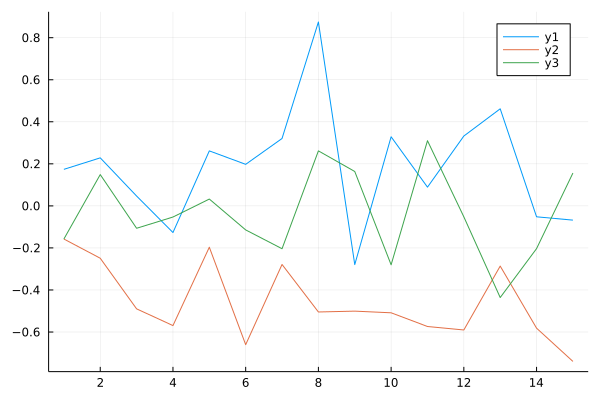

In [28]:
plot(Matrix(first(select(df, Between("Normalized 0", "Normalized 14")), 3))')

I'm not convinced with this normalization at all.
We're normalizing price in a single week.
Wouldn't it make more sense to normalized over products?
So we could compare price dynamics of laptops and apples.
 

In [29]:
Arrow.write("res_sales.arrow", df)

"res_sales.arrow"